<a href="https://colab.research.google.com/github/Provisionalsimo/MetodosNumericos/blob/main/Regresi%C3%B3n_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal para aprendijaze de máquina

Este cuadernillo se usa para hacer una predicción mediante el método de regresión linea simple. Se usa la biblioteca Sklearn sobre aprendizaje de máquina para ello.

Lo primero es **visualizar los datos de entrada**.

Se crea un conjunto de datos para empezar y con ellos se hacen de múltiples ejemplos, todos con una sola característica.

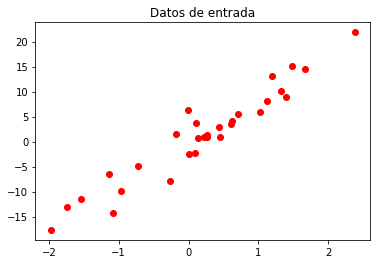

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Crear un conjunto de datos aleatorio
muestras = 30 # número de muestras
ejeX, ejeY = datasets.make_regression(n_features = 1, n_samples = muestras, random_state = 10, noise = 3)

# Comprobar los forma de los datos de entrada
# Y mostrar ese conjunto de datos
plt.title('Datos de entrada')
plt.scatter(ejeX, ejeY, color='red', marker='o')

## Generación del modelo analítico

La hipótesis manejada para un ejemplo sencillo es: $h(x)=\theta_{0} + \theta_{1}x$ donde se busca un $\theta$ para minimizar el modelo.

Los métodos iterativos (como el gradiente descendente) podrían aplicarse para minimizar la función pero en este caso se va a usar la siguiente **ecuación normal**.

$$(X^{T}X)^{-1}.(X^{T}y)$$



In [ ]:
# Computar los datos del eje x en una matriz
matrizX = np.ones((muestras, 3)) 
matrizX[:,2] = ejeX.reshape(muestras)

# Computar la matriz transpuesta 
Xtranspuesta = np.transpose(matrizX)

# Hallar los parámetros usando la ecuación normal anteriormente indicada: 
parametros = np.linalg.pinv(np.dot(Xtranspuesta, matrizX)).dot(np.dot(Xtranspuesta, ejeY))

## Generar modelo (Gradiente descendente)

El gradiente descendiente es un método de optimización numérica para estimar  los mejores coeficientes que minimizan la función de coste.

Una función de costo común es (usando el error cuadrático medio) sobre $m$ ejemplos es:






$$J(\theta_{0}, \theta_{1})= \frac{1}{2m} \sum_{i=1}^{m}{\left (h_{\theta}(x_{i})-y_{i} \right )^2}$$

Las **derivadas parciales** de $\frac{\partial J}{\partial \theta_{0}}$ :

$$\frac{\partial J}{\partial \theta_{0}} = \frac{1}{m} \sum_{i=1}^{m}{\left (h_{\theta}(x_{i})-y_{i} \right )}$$

Las **derivadas parciales** de $\frac{\partial J}{\partial \theta_{1}}$ :

$$\frac{\partial J}{\partial \theta_{1}} = \frac{1}{m} \sum_{i=1}^{m}{\left (h_{\theta}(x_{i})-y_{i} \right ).x_{i}}$$



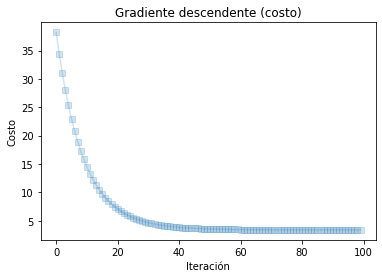

In [ ]:
# Implementación vectorizada de las anteriores ecuaciones
iteraciones = 100
tasaAprendizaje = 0.05
parametros = np.zeros(2)

# Computar la matriz X
matrizX = np.ones((muestras, 2)) 
matrizX[:,1] = ejeX.reshape(muestras)

# Gradiente descendente
estadisticas = np.empty(iteraciones)

for i in range(iteraciones):
    # Actualizar parametros
    error = (np.dot(matrizX, parametros) - ejeY)
    parametros[0] -= np.mean(error * matrizX[:,0]) * tasaAprendizaje
    parametros[1] -= np.mean(error * matrizX[:,1]) * tasaAprendizaje
    
    # Almacenar el costo para futuras graficaciones
    errorNuevo = (np.dot(matrizX, parametros) - ejeY)
    costo = np.dot(errorNuevo, errorNuevo) / (2*muestras)
    estadisticas[i] = costo

plt.title('Gradiente descendente (costo)')
plt.ylabel('Costo')
plt.xlabel('Iteración')
plt.plot(range(iteraciones),estadisticas,'-s', alpha=0.2)

## Predicción del comportamiento de los datos de entrada

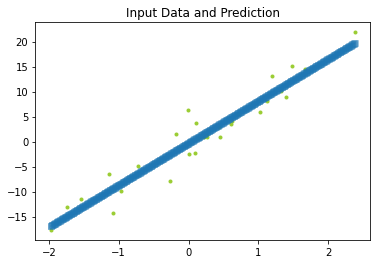

In [ ]:
minimo=np.min(ejeX)
maximo=np.max(ejeX)
trazarX = np.linspace(minimo,maximo,500)
trazarY = parametros[0] + parametros[1] * trazarX 

plt.scatter(ejeX, ejeY, color='yellowgreen', marker='.')
plt.title('Input Data and Prediction')
plt.plot(trazarX, trazarY,'-s', alpha=0.3)